## Time Series Analysis in Python with ARIMA Model
##### For Industrial Production: Electric and gas utilities - https://fred.stlouisfed.org/series/IPG2211A2N

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
data = pd.read_csv('Electric_Production.csv')
print(data.head())
print(data.tail())
print('\n Data Types:')
print(data.dtypes)

         DATE    Value
0  01-01-1985  72.5052
1  02-01-1985  70.6720
2  03-01-1985  62.4502
3  04-01-1985  57.4714
4  05-01-1985  55.3151
           DATE     Value
392  09-01-2017   98.6154
393  10-01-2017   93.6137
394  11-01-2017   97.3359
395  12-01-2017  114.7212
396  01-01-2018  129.4048

 Data Types:
DATE      object
Value    float64
dtype: object


Dataset Description 

The data contains a particular month and Industrial Production of Electric and gas utilities in that month ( [index](https://www.economicsonline.co.uk/Competitive_markets/Index_numbers.html) 2012 = 100). The data type here is object (month) Let’s convert it into a Time series object and use the Month column as our index.



Timestamps are useful objects for comparisons. You can create a timestamp object with the pd.to_datetime function and a string specifying the date. These timestamps are useful when you need to do logical filtering with dates.

In [3]:
from datetime import datetime
con=data['DATE']
data['DATE']=pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01'],
              dtype='datetime64[ns]', name='DATE', length=397, freq=None)

You can see that now the data type is ‘datetime64[ns]’.Now let’s just make it into a series rather than a data frame ( this would make it easier for the blog explanation )

In [4]:
#convert to time series:
ts = data['Value']
ts.head(10)

DATE
1985-01-01    72.5052
1985-02-01    70.6720
1985-03-01    62.4502
1985-04-01    57.4714
1985-05-01    55.3151
1985-06-01    58.0904
1985-07-01    62.6202
1985-08-01    63.2485
1985-09-01    60.5846
1985-10-01    56.3154
Name: Value, dtype: float64

### Let’s explore the various properties of date-time based index:

In [5]:
#1. Specify the index as a string constant:
ts['1985-01-01']

72.5052

In [6]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(1985,1,1)]

72.5052

In [7]:
#1. Specify the entire range:
ts['1985-01-01':'1985-05-01']

DATE
1985-01-01    72.5052
1985-02-01    70.6720
1985-03-01    62.4502
1985-04-01    57.4714
1985-05-01    55.3151
Name: Value, dtype: float64

In [8]:
#2. Use ':' if one of the indices is at ends:
ts[:'1985-05-01']

DATE
1985-01-01    72.5052
1985-02-01    70.6720
1985-03-01    62.4502
1985-04-01    57.4714
1985-05-01    55.3151
Name: Value, dtype: float64

In [9]:
#All rows of 1985:
ts['1985']

DATE
1985-01-01    72.5052
1985-02-01    70.6720
1985-03-01    62.4502
1985-04-01    57.4714
1985-05-01    55.3151
1985-06-01    58.0904
1985-07-01    62.6202
1985-08-01    63.2485
1985-09-01    60.5846
1985-10-01    56.3154
1985-11-01    58.0005
1985-12-01    68.7145
Name: Value, dtype: float64

### STATIONARITY

This is a very important concept in Time Series Analysis. In order to apply a time series model, it is important for the Time series to be stationary; in other words all its statistical properties (mean,variance) remain constant over time. This is done basically because if you take a certain behavior over time, it is important that this behavior is same in the future in order for us to forecast the series. There are a lot of statistical theories to explore stationary series than non-stationary series. (Thus we can bring the fight to our home ground!)

In practice we can assume the series to be stationary if it has constant statistical properties over time and these properties can be:

• constant mean

• constant variance

• an auto co-variance that does not depend on time.

These details can be easily retrieved using stat commands in python.
The best way to understand you stationarity in a Time Series is by eye-balling the plot:

In [10]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

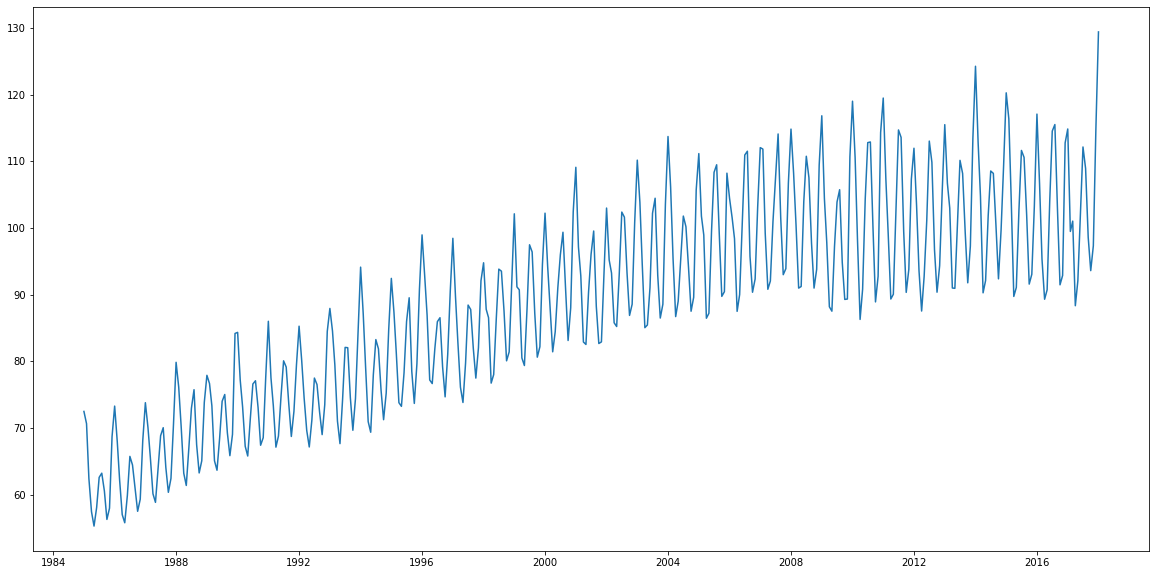

In [11]:
plt.figure(figsize=(20,10))
plt.plot(ts)

It’s clear from the plot that there is an overall increase in the trend and with some seasonality in it.

### Stationarity testing 

Plotting Rolling Statistics :The function will plot the moving mean or moving Standard Deviation. This is still visual method


NOTE: moving mean and moving standard deviation — At any instant ‘t’, we take the mean/std of the last year which in this case is 12 months)


Dickey-fuller Test :This is one of the statistical tests for checking stationarity. First we consider the null hypothesis: the time series is non- stationary. The result from the rest will contain the test statistic and critical value for different confidence levels. The idea is to have Test statistics less than critical value, in this case we can reject the null hypothesis and say that this Time series is indeed stationary (the force is strong with this one !!)
More details for Dickey fuller Test.

Function details:

mean

Standard deviation (instead of variance)

Plot original series

Plot mean

Plot std

Plot Dickey-Fuller test

In [12]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

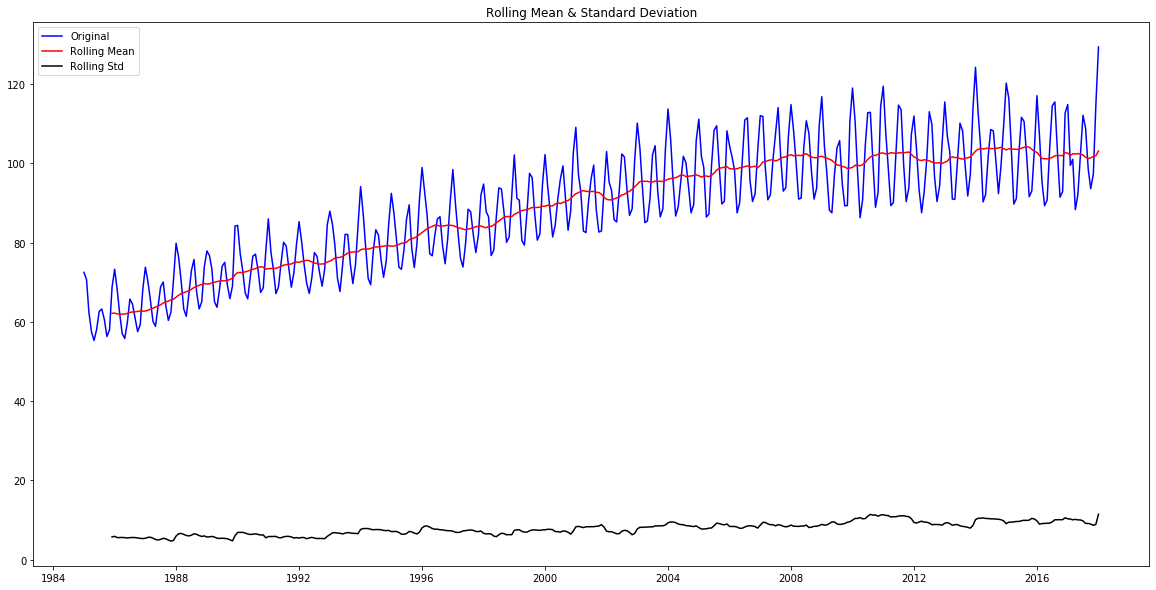

Results of Dickey-Fuller Test:
Test Statistic                  -2.256990
p-value                          0.186215
#Lags Used                      15.000000
Number of Observations Used    381.000000
Critical Value (1%)             -3.447631
Critical Value (5%)             -2.869156
Critical Value (10%)            -2.570827
dtype: float64


In [13]:
plt.figure(figsize=(20,10))
test_stationarity(ts)

This is not stationary because :

• mean is increasing even though the std is small.

• Test stat is > critical value.

• Note: the signed values are compared and the absolute values.

### MAKING THE TIME SERIES STATIONARY

There are two major factors that make a time series non-stationary. They are:
    
    
• Trend: non-constant mean
    
• Seasonality: Variation at specific time-frames
    
    
The basic idea is to model the trend and seasonality in this series, so we can remove it and make the series stationary. Then we can go ahead and apply statistical forecasting to the stationary series. And finally we can convert the forecasted values into original by applying the trend and seasonality constrains back to those that we previously separated.
Let’s start by working on the trend piece.


#### TREND 

The first step is to reduce the trend using transformation, as we can see here that there is a strong positive trend. These transformation can be log, sq-rt, cube root etc . Basically it penalizes larger values more than the smaller. In this case we will use the logarithmic transformation.

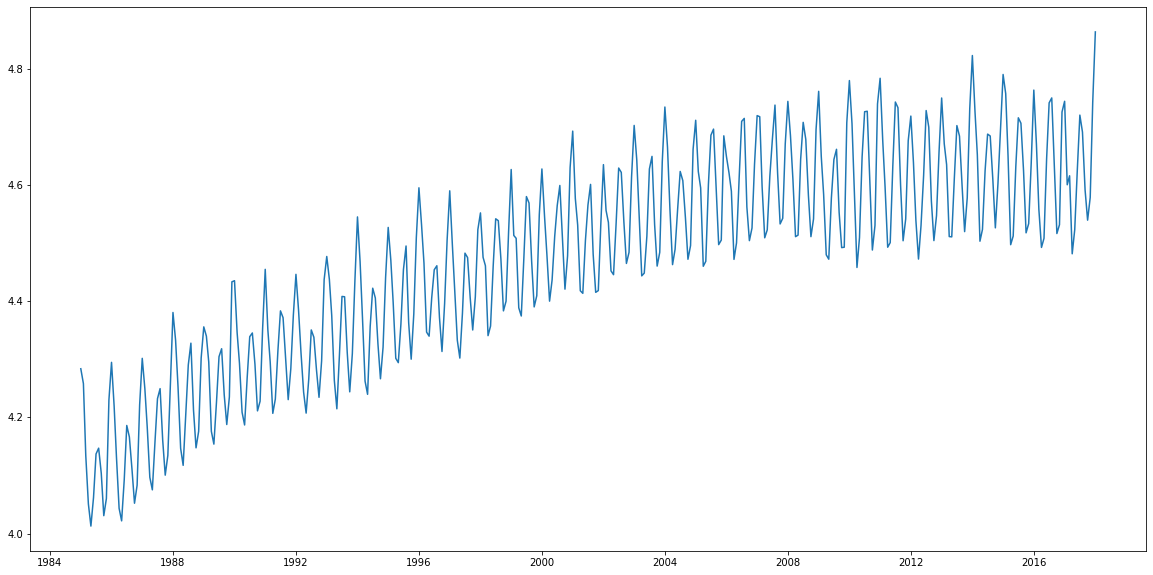

In [14]:
ts_log = np.log(ts)
plt.figure(figsize=(20,10))
plt.plot(ts_log)

##### Smoothing 

There is some noise in realizing the forward trend here. There are some methods to model these trends and then remove them from the series. Some of the common ones are:

• Smoothing: using rolling/moving average

• Aggression: by taking the mean for a certain time period (year/month)

We will be using Smoothing here.

##### Smoothing:
In smoothing we usually take the past few instances (rolling estimates) We will discuss two methods under smoothing- Moving average and Exponentially weighted moving average.

Moving average -
First take x consecutive values and this depends on the frequency if it is 1 year we take 12 values. Lucky for us that Pandas has a function for rolling estimate

###### Moving average

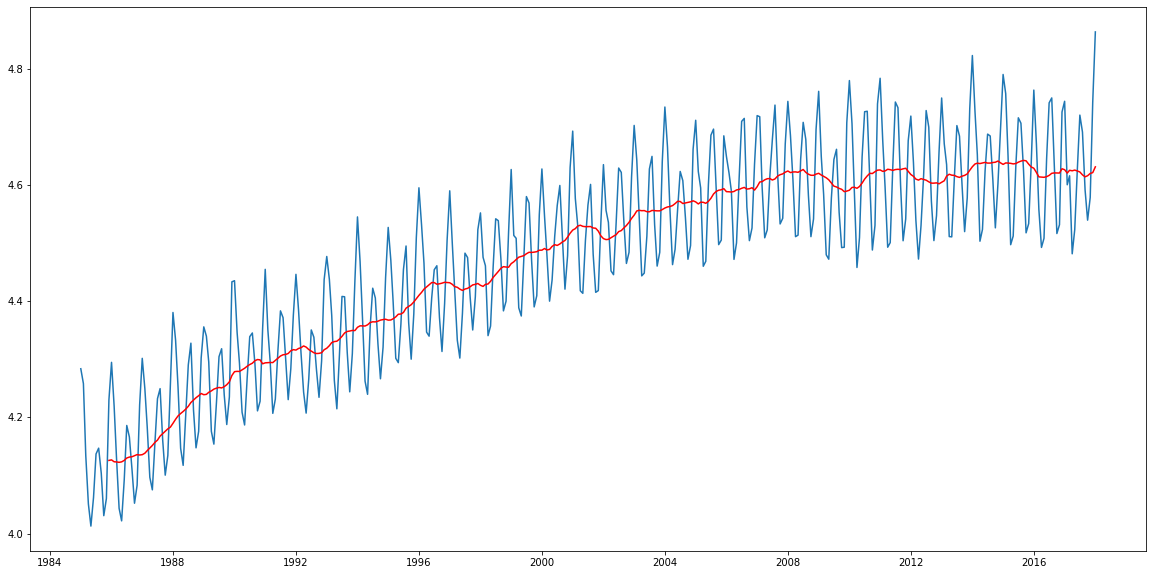

In [15]:
moving_avg = pd.Series(ts_log).rolling(12).mean()
plt.figure(figsize=(20,10))
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

Now subtract the rolling mean from the original series.

In [16]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

DATE
1985-01-01         NaN
1985-02-01         NaN
1985-03-01         NaN
1985-04-01         NaN
1985-05-01         NaN
1985-06-01         NaN
1985-07-01         NaN
1985-08-01         NaN
1985-09-01         NaN
1985-10-01         NaN
1985-11-01         NaN
1985-12-01    0.103961
Name: Value, dtype: float64

In [17]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

DATE
1985-12-01    0.103961
1986-01-01    0.167724
1986-02-01    0.095629
1986-03-01    0.007329
1986-04-01   -0.079115
Name: Value, dtype: float64

The reason there are null values is because we take the average of first 12 so 11 values are null. We can also see that in the visual representation. Thus it is dropped for further analysis. Now let’s parse it to the function to check for stationarity.

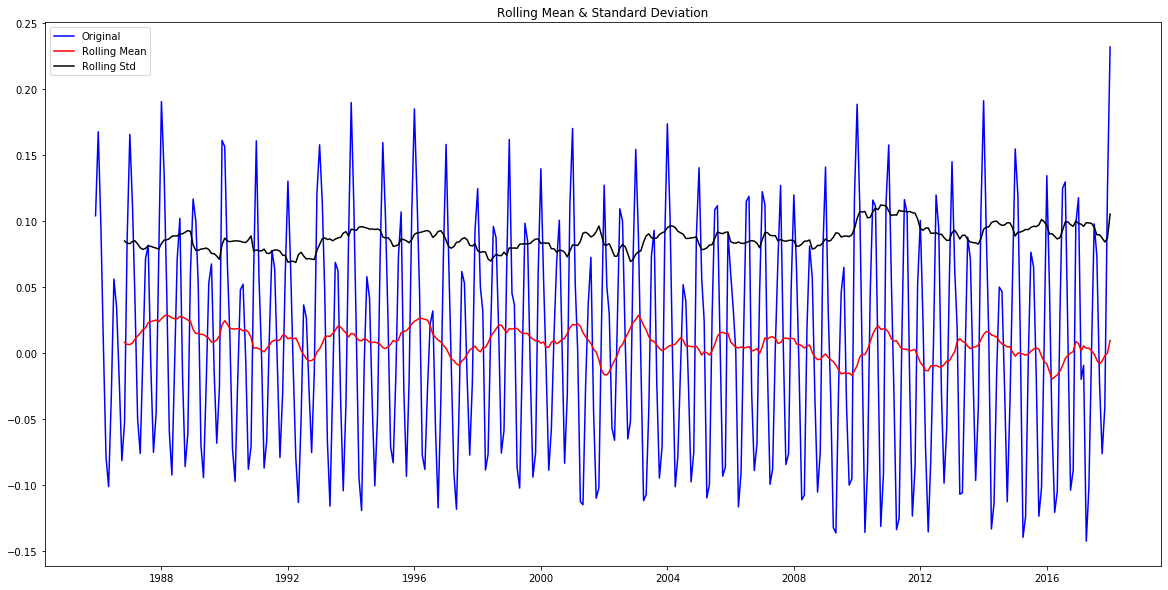

Results of Dickey-Fuller Test:
Test Statistic                  -5.211586
p-value                          0.000008
#Lags Used                      15.000000
Number of Observations Used    370.000000
Critical Value (1%)             -3.448148
Critical Value (5%)             -2.869383
Critical Value (10%)            -2.570948
dtype: float64


In [18]:
plt.figure(figsize=(20,10))
test_stationarity(ts_log_moving_avg_diff)

We notice two things:

• The rolling values are varying slightly but there is no specific trend.

• The test statistics is smaller than the 5 % critical values. That tells us that we are 95% confident that this series is stationary.

In this example we can easily take a time period (12 months for a year), but there are situations where the time period range is more complex like stock price etc. So we use the exponentially weighted moving average (there are other weighted moving averages but for starters, lets use this). The previous values are assigned with a decay factor. Pandas again comes to the rescue with some awesome functions for it, like:

###### Exponentially weighted moving average

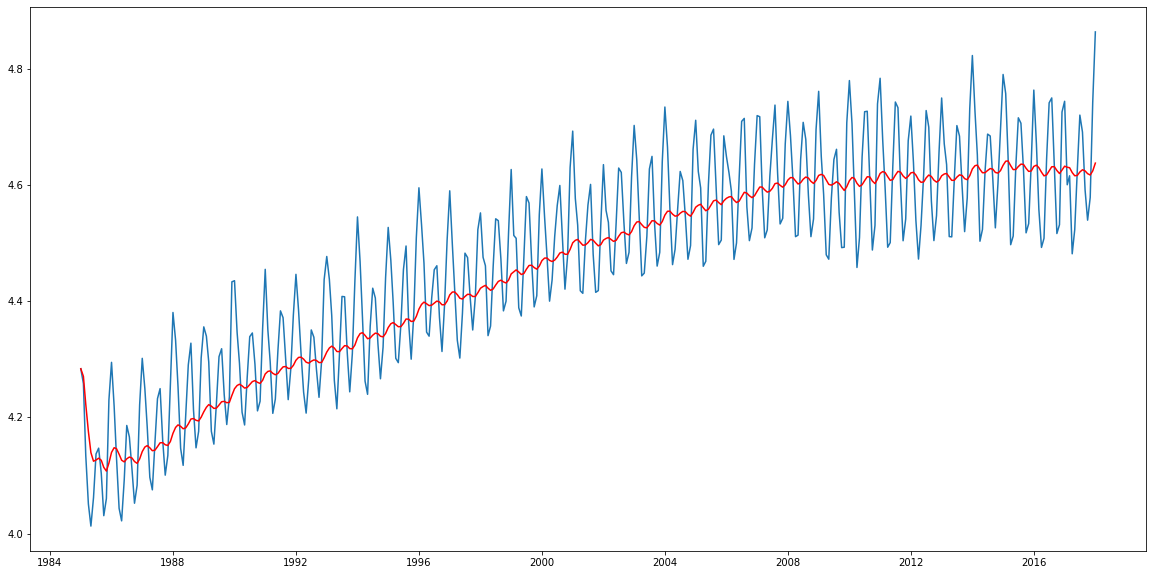

In [19]:
expwighted_avg = ts_log.ewm(halflife=12).mean()

plt.figure(figsize=(20,10))
plt.plot(ts_log)
plt.plot(expwighted_avg,color='red')

the parameter (halflife) is assumed 12, but it really depends on the domain. Let’s check stationarity now:


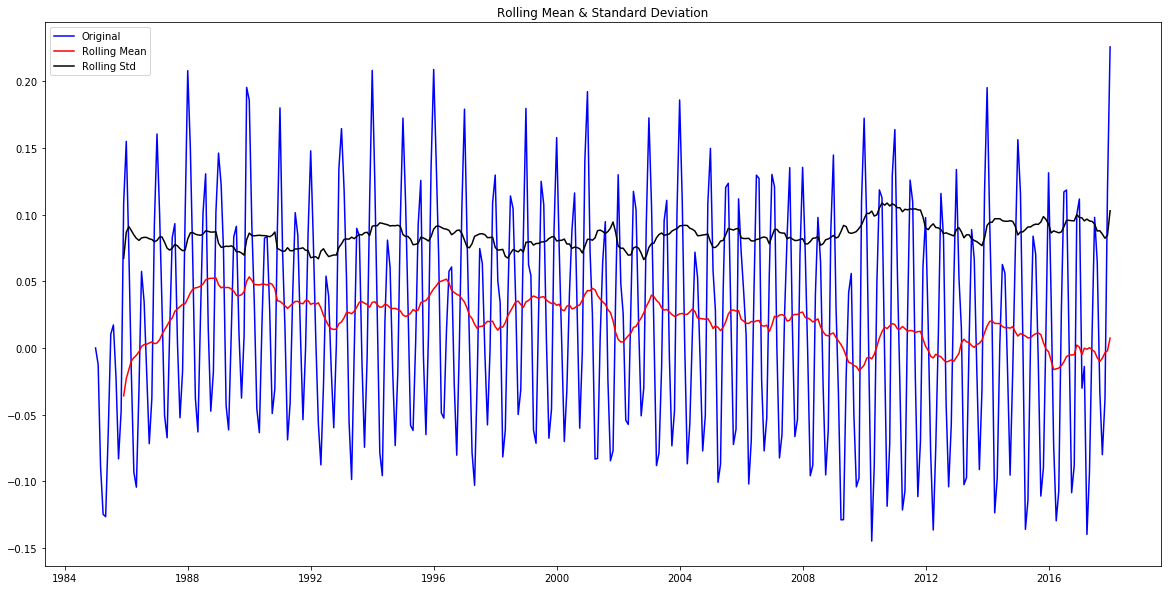

Results of Dickey-Fuller Test:
Test Statistic                  -3.251531
p-value                          0.017189
#Lags Used                      15.000000
Number of Observations Used    381.000000
Critical Value (1%)             -3.447631
Critical Value (5%)             -2.869156
Critical Value (10%)            -2.570827
dtype: float64


In [20]:
ts_log_ewma_diff = ts_log - expwighted_avg
plt.figure(figsize=(20,10))
test_stationarity(ts_log_ewma_diff)

It is stationary because:
    
• Rolling values have less variations in mean and standard deviation in magnitude.

• the test statistic is somewhat equal to 1% of the critical value. So we can say we are almost 99% confident that this is stationary.

#### SEASONALITY (ALONG WITH TREND) 

Previously we saw just trend part of the time series, now we will see both trend and seasonality. Most Time series have trends along with seasonality. There are two common methods to remove trend and seasonality, they are:

• Differencing: by taking difference using time lag

• Decomposition: model both trend and seasonality, then remove them

#### Differencing:
    
Here we first take the difference of the value at a particular time with that of the previous time. Now let’s do it in Pandas.

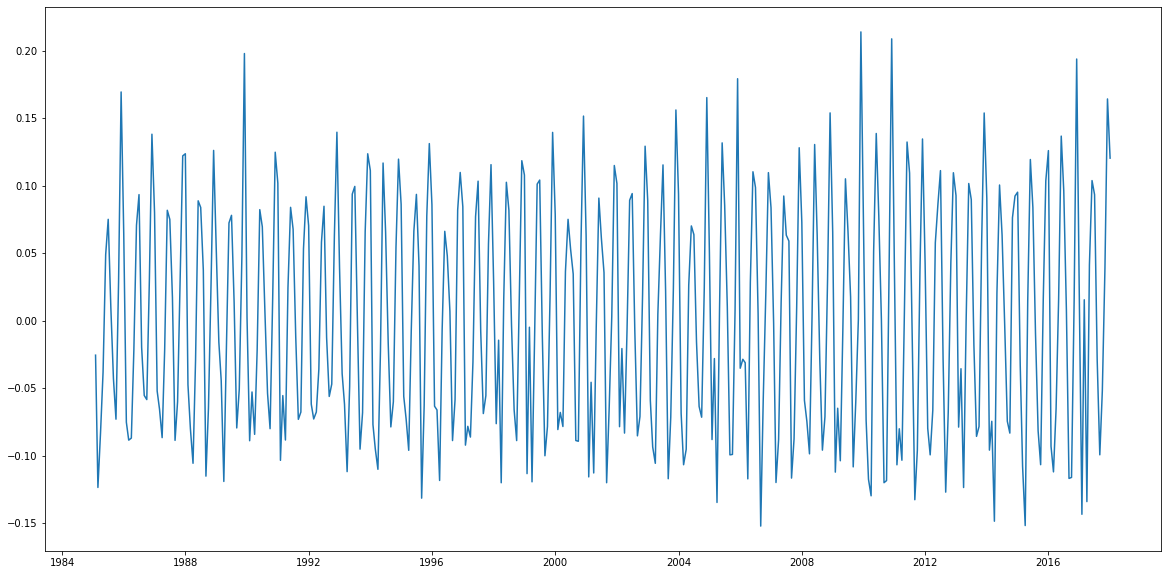

In [21]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.figure(figsize=(20,10))
plt.plot(ts_log_diff)

Looks ok to me but let’s parse it using our stationary testing function

In [22]:
ts_log_diff.isnull().sum()

1

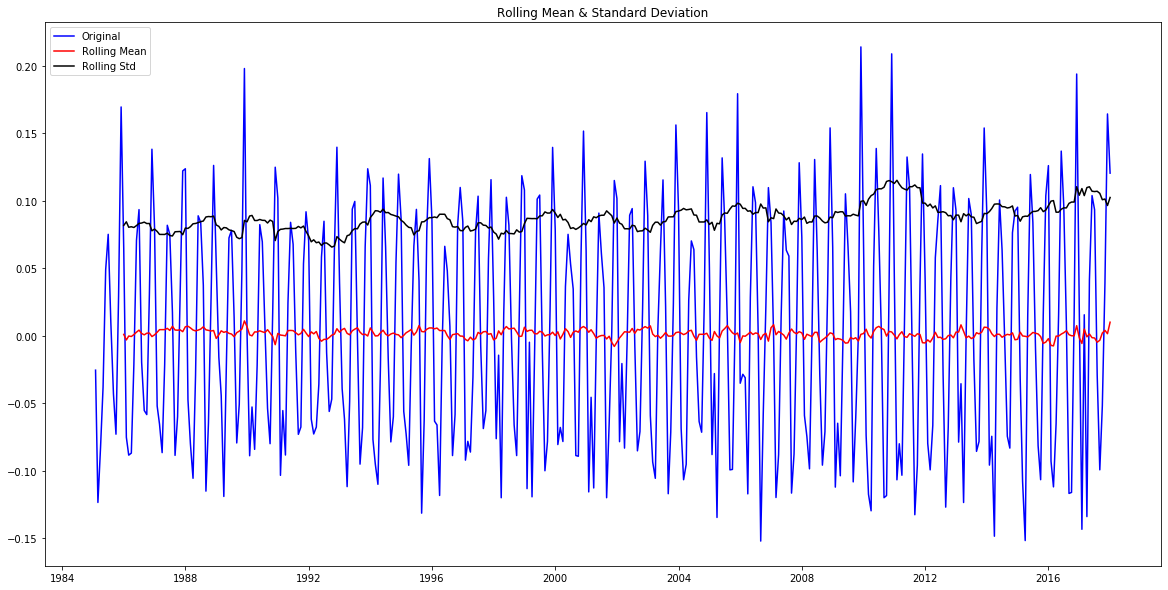

Results of Dickey-Fuller Test:
Test Statistic                -6.748333e+00
p-value                        2.995161e-09
#Lags Used                     1.400000e+01
Number of Observations Used    3.810000e+02
Critical Value (1%)           -3.447631e+00
Critical Value (5%)           -2.869156e+00
Critical Value (10%)          -2.570827e+00
dtype: float64


In [23]:
ts_log_diff.dropna(inplace=True)
plt.figure(figsize=(20,10))
test_stationarity(ts_log_diff)

It is stationary because:
    
• the mean and std variations have small variations with time.

• test statistic is less than 10% of the critical values, so we can be 90 % confident that this is stationary.

#### Decomposing:

Here we model both the trend and the seasonality, then the remaining part of the time series is returned. Guess what? Yup, we have some awesome function for it. Let’s check it out:


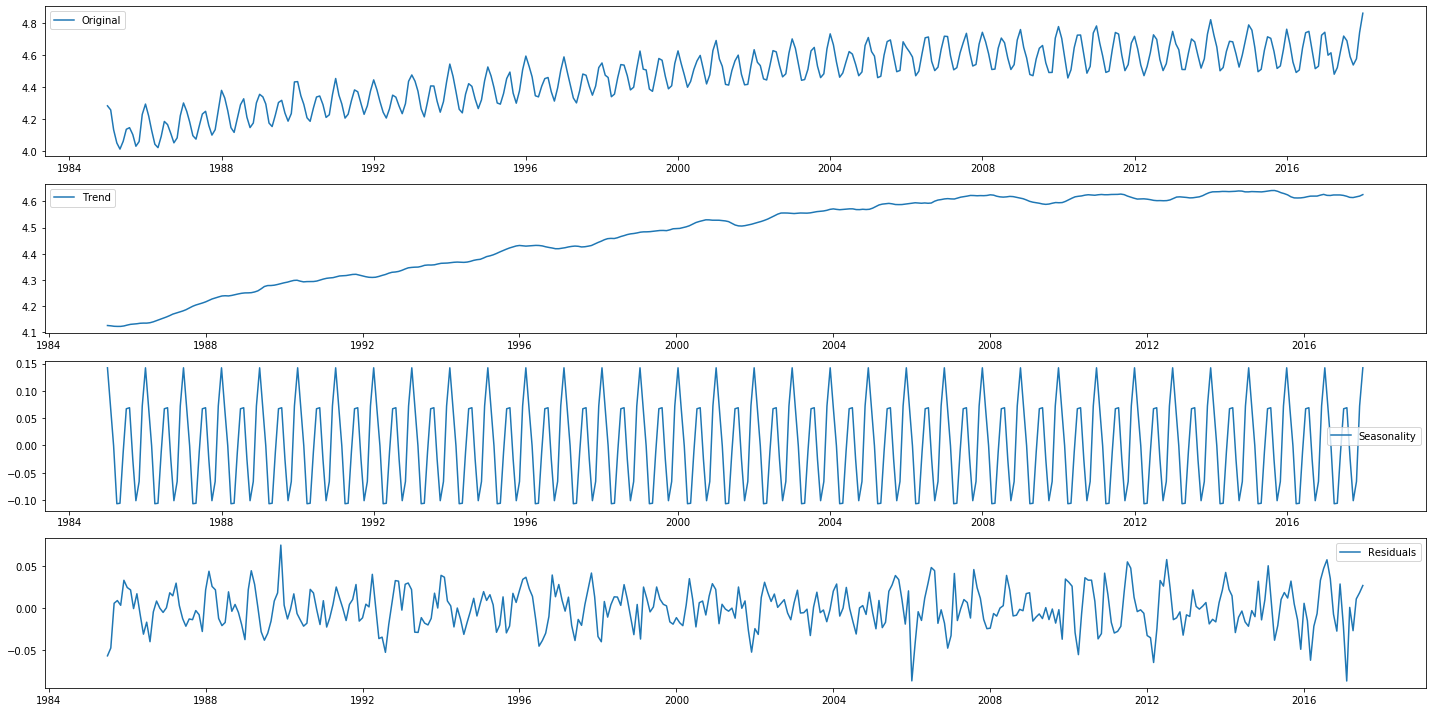

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Remove the trend and seasonality from the Time series and now we can use the residual values. Let’s check stationarity.

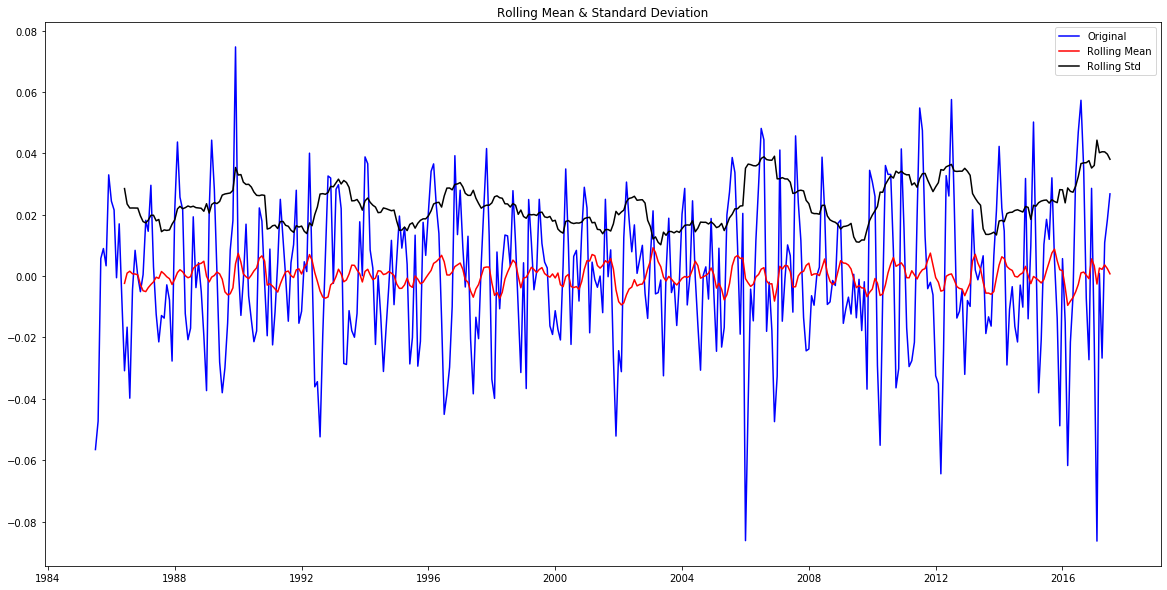

Results of Dickey-Fuller Test:
Test Statistic                -1.000311e+01
p-value                        1.861632e-17
#Lags Used                     1.400000e+01
Number of Observations Used    3.700000e+02
Critical Value (1%)           -3.448148e+00
Critical Value (5%)           -2.869383e+00
Critical Value (10%)          -2.570948e+00
dtype: float64


In [25]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
plt.figure(figsize=(20,10))
test_stationarity(ts_log_decompose)

This is stationary because:
    
• test statistic is lower than 1% critical values.

• the mean and std variations have small variations with time.

### FORECASTING A TIME SERIES 

Now that we have made the Time series stationary, let’s make models on the time series using differencing because it is easy to add the error , trend and seasonality back into predicted values .

We will use statistical modelling method called ARIMA to forecast the data where there are dependencies in the values.
Auto Regressive Integrated Moving Average(ARIMA) — It is like a liner regression equation where the predictors depend on parameters (p,d,q) of the ARIMA model .

Let me explain these dependent parameters:

• p : This is the number of AR (Auto-Regressive) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3).

• q : This is the number of MA (Moving-Average) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3).

• d :This is the number of differences or the number of non-seasonal differences .
Now let’s check out on how we can figure out what value of p and q to use. We use two popular plotting techniques; they are:

• Autocorrelation Function (ACF): It just measures the correlation between two consecutive (lagged version). example at lag 4, ACF will compare series at time instance t1…t2 with series at instance t1–4…t2–4

• Partial Autocorrelation Function (PACF): is used to measure the degree of association between y(t) and y(t-p).

#### ACF & PACF  

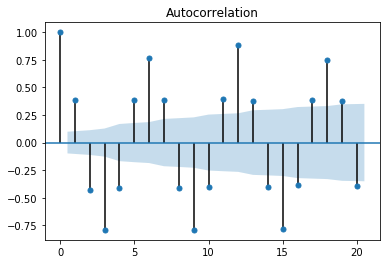

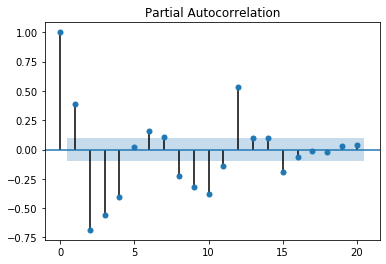

<Figure size 1440x720 with 0 Axes>

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_log_diff, lags =20)
plot_pacf(ts_log_diff, lags =20)
plt.figure(figsize=(20,10))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


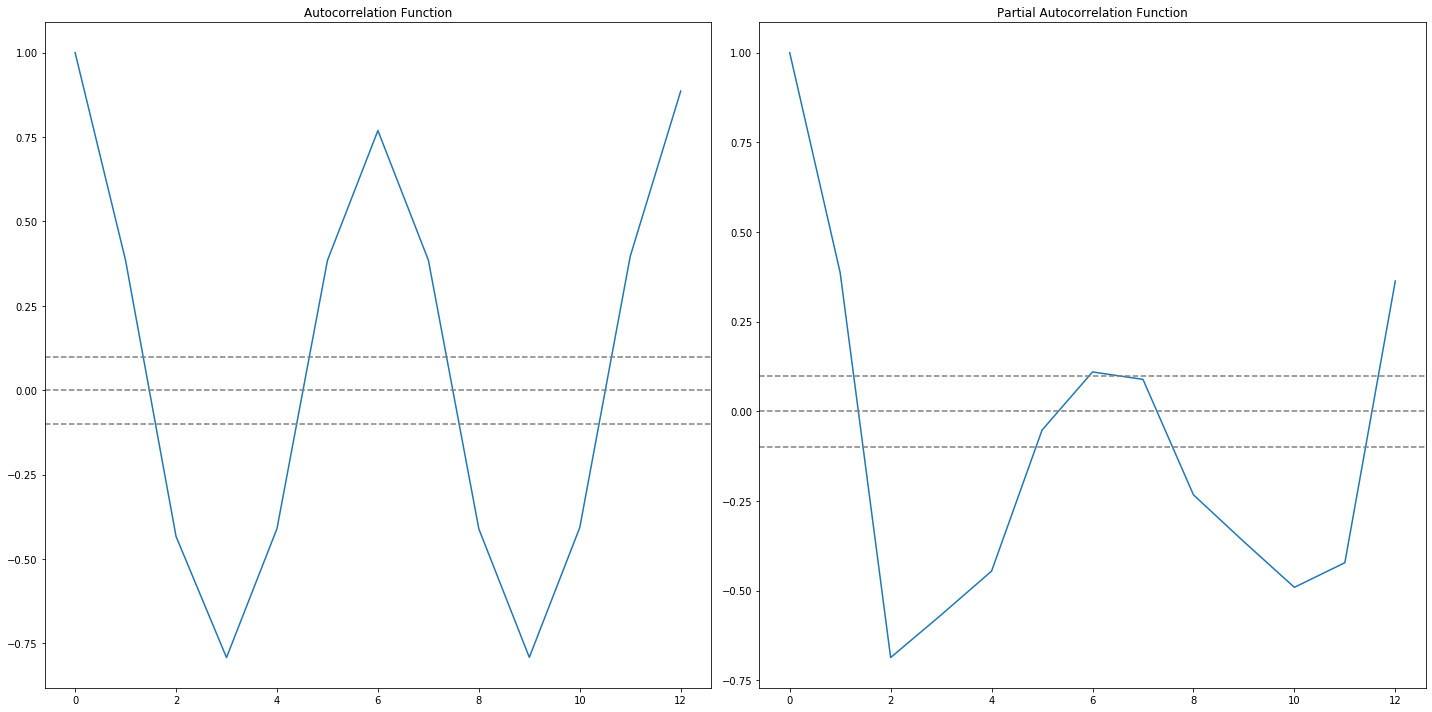

In [27]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMA
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=12)
lag_pacf = pacf(ts_log_diff, nlags=12, method='ols')

plt.figure(figsize=(20,10))
#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

The two dotted lines on either sides of 0 are the confidence intervals. These can be used to determine the ‘p’ and ‘q’ values as:

• p: The first time where the PACF crosses the upper confidence interval, here its close to 2. hence p = 2.

• q: The first time where the ACF crosses the upper confidence interval, here its close to 2. hence p = 2.

Now, using this make 3 different ARIMA models considering individual as well as combined effects. I will also print the RSS for each. Please note that here RSS is for the values of residuals and not actual series.

## AR Model

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.2738')

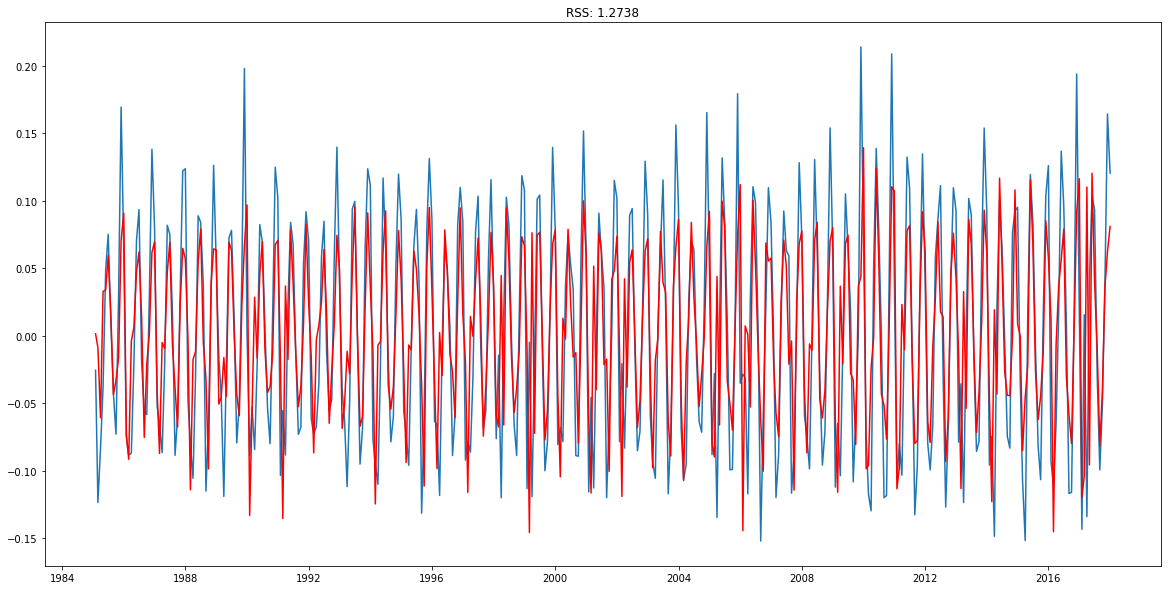

In [28]:
#AR model
model = ARIMA(ts_log, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(20,10))
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - ts_log_diff)**2))

## MA Model

In [29]:
#MA model
try:
    model = ARIMA(ts_log, order=(0,1,2))
    results_MA = model.fit(disp=-1)
    plt.figure(figsize=(20,10))
    plt.plot(ts_log_diff)
    plt.plot(results_MA.fittedvalues, color='red')
    plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - ts_log_diff)**2))
except:
    pass

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


## ARIMA MODEL

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.5177')

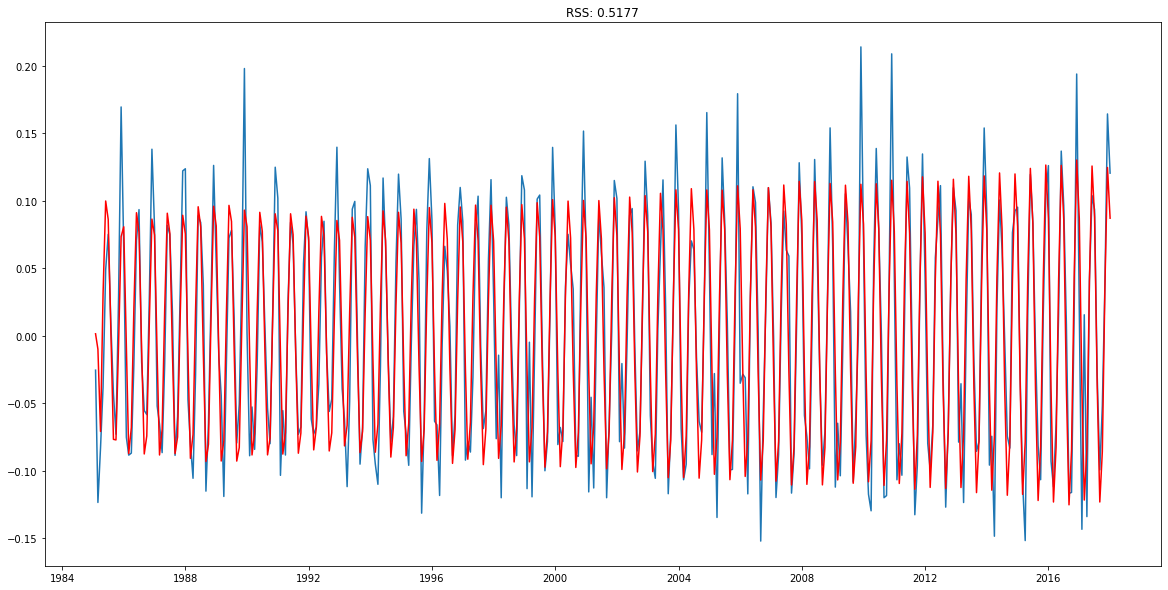

In [30]:
#ARIMA model
model = ARIMA(ts_log, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.figure(figsize=(20,10))
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - ts_log_diff)**2))

RSS values:

• AR=1.2738

• MA= ERROR

• ARIMA = 0.5177

ARIMA has the best RSS value.

FINAL STEP: BRINGING THIS BACK TO THE ORIGINAL SCALE

Steps involved:

• First get the predicted values and store it as series. You will notice the first month is missing because we took a lag of 1(shift).

• Now convert differencing to log scale: find the cumulative sum and add it to a new series with a base value (here the first-month value of the log series).

In [31]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
print(predictions_ARIMA_diff.head())

DATE
1985-02-01    0.001364
1985-03-01   -0.010062
1985-04-01   -0.071047
1985-05-01    0.030868
1985-06-01    0.099794
dtype: float64


In [32]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

DATE
1985-02-01    0.001364
1985-03-01   -0.008698
1985-04-01   -0.079745
1985-05-01   -0.048877
1985-06-01    0.050917
dtype: float64


In [33]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index = ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value = 0)
predictions_ARIMA_log.head()

DATE
1985-01-01    4.283658
1985-02-01    4.285022
1985-03-01    4.274960
1985-04-01    4.203913
1985-05-01    4.234781
dtype: float64

• Next -take the exponent of the series from above (anti-log) which will be the predicted value — the time series forecast model.
Now plot the predicted values with the original.

• Find the RMSE

Text(0.5, 1.0, 'RMSE: 12.8880')

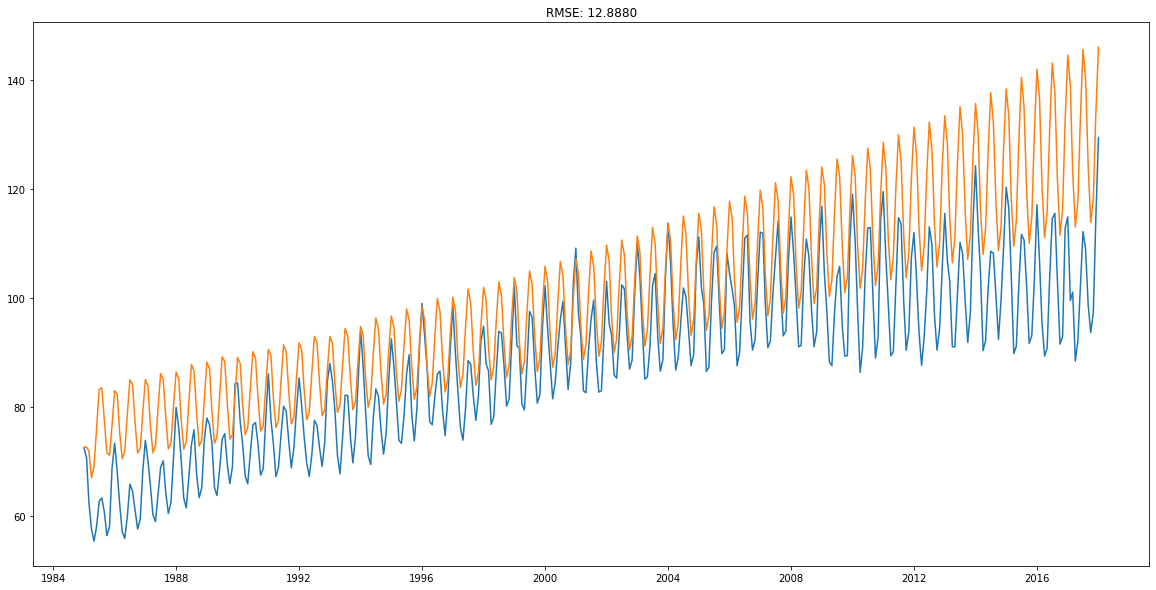

In [34]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(20,10))
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA - ts)**2)/len(ts)))

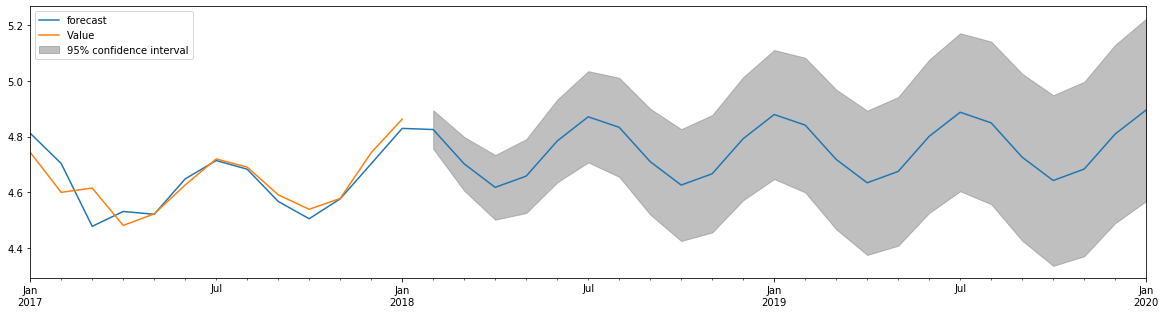

In [35]:
fig, ax = plt.subplots(figsize=(20,5))
fig = results_ARIMA.plot_predict(start='2017-01-01', end='2020-01-01',ax=ax)
legend = ax.legend(loc='upper left')
plt.show()

### Prediction for 2018-1-2 to 2018-12-12 (11 Steps forward)

In [36]:
results = results_ARIMA.forecast(steps = 11)
results

(array([4.82546277, 4.70225904, 4.61798203, 4.65831455, 4.78424979,
        4.87113639, 4.83340991, 4.71019908, 4.6261587 , 4.6667348 ,
        4.79267684]),
 array([0.03534703, 0.04915442, 0.0591416 , 0.06763153, 0.07569554,
        0.08350767, 0.09067972, 0.09689864, 0.10232712, 0.10745817,
        0.11270873]),
 array([[4.75618387, 4.89474167],
        [4.60591814, 4.79859994],
        [4.50206663, 4.73389743],
        [4.52575918, 4.79086992],
        [4.63588925, 4.93261032],
        [4.70746435, 5.03480842],
        [4.65568094, 5.01113889],
        [4.52028124, 4.90011692],
        [4.42560123, 4.82671618],
        [4.45612065, 4.87734895],
        [4.57177179, 5.01358189]]))

In [37]:
converted_results = [(np.exp(x)) for x in [i for i in results]]
converted_results

[array([124.64413646, 110.19582833, 101.28942686, 105.45818769,
        119.61159503, 130.4690959 , 125.63864799, 111.07427041,
        102.12103254, 106.34992064, 120.6238274 ]),
 array([1.03597916, 1.05038254, 1.06092546, 1.06997099, 1.07863412,
        1.08709356, 1.09491826, 1.10174869, 1.10774578, 1.11344429,
        1.11930587]),
 array([[116.30125699, 133.58549302],
        [100.07482353, 121.34041463],
        [ 90.20335562, 113.73798595],
        [ 92.36602164, 120.40606659],
        [103.11957676, 138.74119847],
        [110.7709274 , 153.67014961],
        [105.18081705, 150.07555857],
        [ 91.86142927, 134.30548213],
        [ 83.56303282, 124.80046421],
        [ 86.15264333, 131.28216598],
        [ 96.71531681, 150.44264152]])]

In [38]:
prediction_df = pd.DataFrame(converted_results)
prediction_df = prediction_df.T.reset_index().reindex(columns=['index',0,1,2])
prediction_df['confidence'] = pd.Series(prediction_df.iloc[:,[3]].values.flatten())
prediction_df['under_line'] = prediction_df['confidence'].str[0]
prediction_df['over_line'] = prediction_df['confidence'].str[1]
prediction_df = prediction_df.drop(prediction_df.columns[[2, 3]], axis=1)
prediction_df

,index,0,confidence,under_line,over_line
0,0,124.644,"[116.30125698594081, 133.58549302458113]",116.301257,133.585493
1,1,110.196,"[100.07482352671136, 121.34041462507176]",100.074824,121.340415
2,2,101.289,"[90.20335561879158, 113.73798595462087]",90.203356,113.737986
3,3,105.458,"[92.36602163601097, 120.40606659080815]",92.366022,120.406067
4,4,119.612,"[103.11957675686328, 138.7411984701112]",103.119577,138.741198
5,5,130.469,"[110.77092740203882, 153.6701496057214]",110.770927,153.670150
6,6,125.639,"[105.1808170519445, 150.07555856766038]",105.180817,150.075559
7,7,111.074,"[91.86142926927099, 134.30548212506085]",91.861429,134.305482
8,8,102.121,"[83.56303282167, 124.8004642129869]",83.563033,124.800464
9,9,106.35,"[86.15264332580914, 131.28216598441833]",86.152643,131.282166


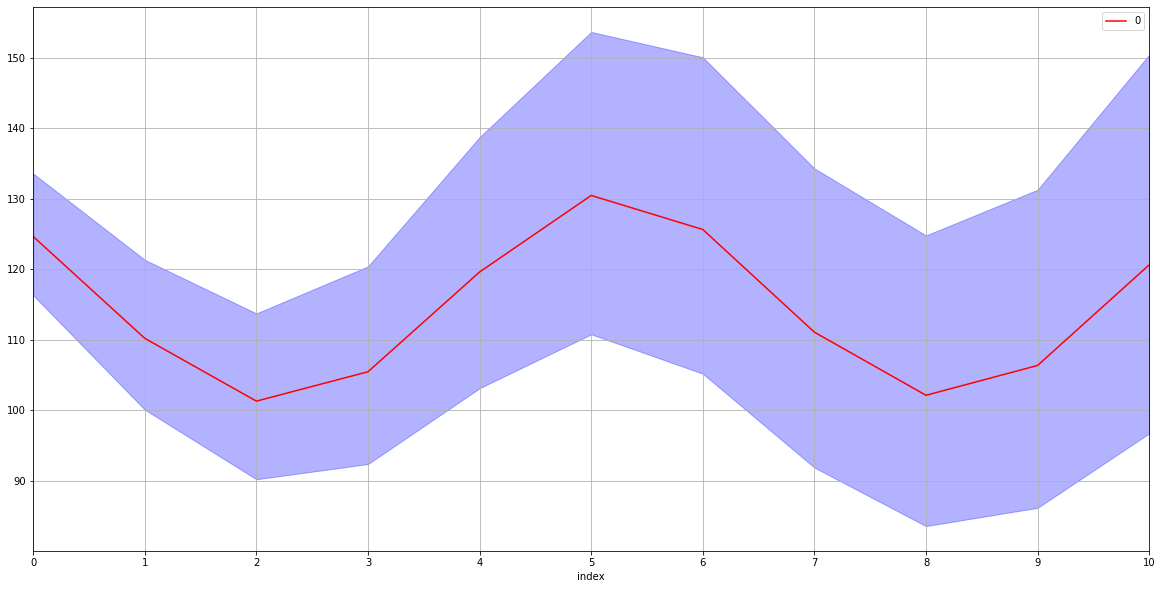

In [39]:
plt.figure(figsize=(20,10))
ax = plt.gca()
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
prediction_df.plot(kind='line',x='index',y=0, color='red', ax=ax)
plt.fill_between(prediction_df.index, prediction_df['under_line'], prediction_df['over_line'], color='b', alpha=.3)
plt.xticks(prediction_df.index)
plt.grid(True)
plt.show()

### What really happened in that time period 2018-1-2 to 2018-12-12

###### Taken from - https://fred.stlouisfed.org/series/IPG2211A2N

![](Capture.JPG)

#### Lets overlay that with our prediction

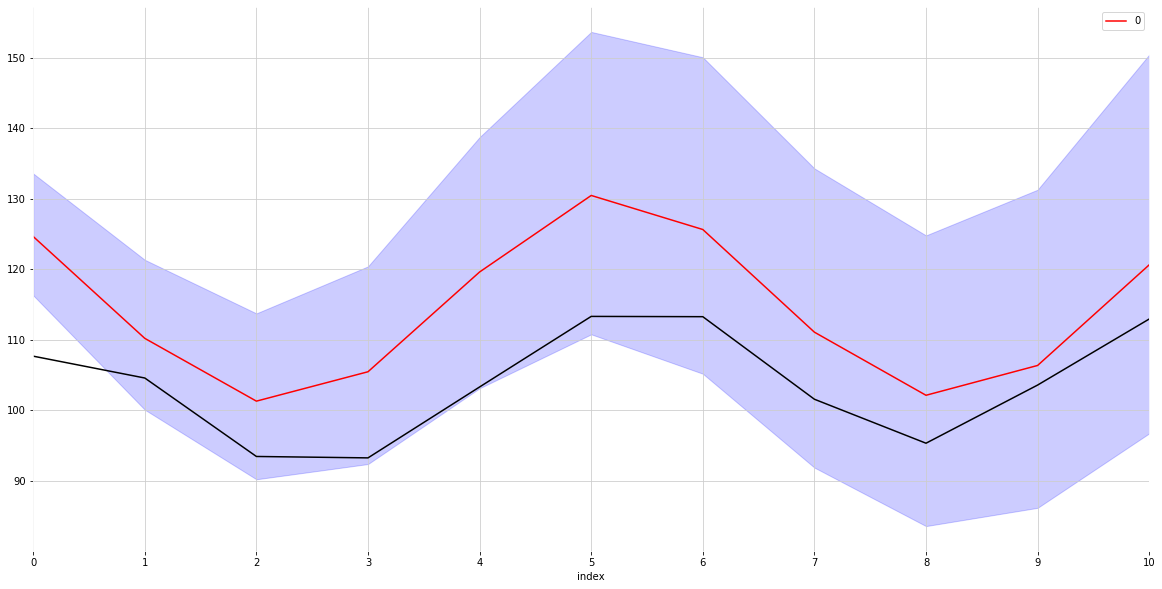

In [40]:
plt.figure(figsize=(20,10))
ax = plt.gca()
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.plot([0,1,2,3,4,5,6,7,8,9,10],[107.67, 104.57, 93.44, 93.24, 103.30, 113.31, 113.27, 101.56, 95.32, 103.57, 112.94], 'k-')
prediction_df.plot(kind='line',x='index',y=0, color='red', ax=ax)
plt.fill_between(prediction_df.index, prediction_df['under_line'], prediction_df['over_line'], color='b', alpha=.2)
plt.xticks(prediction_df.index)
plt.grid(True)
plt.show()

#### Actual data(black) lies within the confidence level(blue)!, I say our prediction is quite good.

#### Sources -
* Using Python and Auto ARIMA to Forecast Seasonal Time Series - https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c

* Predict Electricity Consumption using Time Series analysis - https://towardsdatascience.com/predict-electricity-consumption-using-time-series-analysis-4650284e40aa

* Time Series Forecast : A basic introduction using Python. - https://medium.com/@stallonejacob/time-series-forecast-a-basic-introduction-using-python-414fcb963000

* Time Series Analysis in Python - https://www.youtube.com/watch?v=e8Yw4alG16Q

* Time Series For beginners with ARIMA - https://www.kaggle.com/freespirit08/time-series-for-beginners-with-arima

* ARIMA Model Python Example — Time Series Forecasting - https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7
